# Regularyzacja w modelu regresji - wstęp

In [4]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

from scipy import stats
from patsy import dmatrices

from statsmodels.api import OLS, add_constant
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Zadanie 1a

Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + e,
$$
gdzie $e\sim\mathcal{N}(\mu, \sigma)$. 
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}$.

Zaznacz na wykresie rozproszenia punktów $(x, y)$ funkcję regresji.

**Wskazówka**: `ols('y ~ x + I(x**k)', data_frame)` z `statsmodels.formula.api` lub `PolynomialFeatures` z `sklearn.preprocessing`

In [5]:
n = 50
x = stats.uniform.rvs(size=n, loc=-3, scale=6)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + stats.norm.rvs(size=n, loc=2, scale=2)

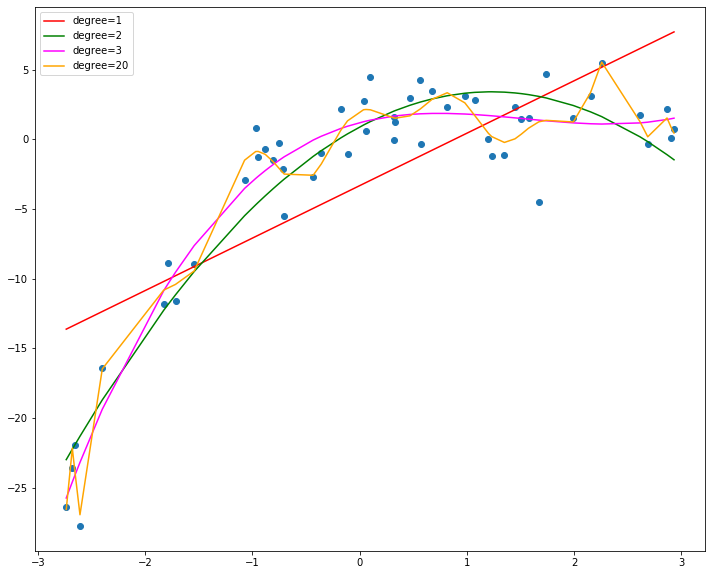

In [6]:
import operator

colors = ['red', 'green', 'magenta', 'orange']
degrees = [1, 2, 3, 20]

plt.scatter(x, y)
sort_axis = operator.itemgetter(0)

for i, deg in enumerate(degrees):
    if deg == 1:
        X = add_constant(x, prepend=True, has_constant='skip')
    else:
        polynomial_features = PolynomialFeatures(degree=deg)
        X = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = OLS(endog=y, exog=X).fit()
    
    sorted_zip = sorted(zip(x, model.fittedvalues), key=sort_axis)
    x_range, y_poly_pred = zip(*sorted_zip)
    plt.plot(x_range, y_poly_pred, color=colors[i], label="degree={}".format(deg))

plt.legend()

# Zadanie 1b

Dla wygenerowanej pary punktów dopasuj model regresji:

a) wielomianowej stopnia 20 z regularyzacją grzbietową (Ridge) z parametrem $\alpha = 0.1$,

b) wielomianowej stopnia 20 z regularyzacją Lasso z parametrem $\alpha = 0.1$.

Powtórz podpunkt a) i b) dla różnych wartości parametru $\alpha$, np. $\alpha \in \{0.001, 0.005, 0.01, 0.5, 1, 5\}$.

In [12]:
# Rigde
# Sposob I
X = x.reshape(-1, 1)
polynomial_features_20 = PolynomialFeatures(degree=20)
X20 = polynomial_features_20.fit_transform(X)

In [14]:
X20.shape

(50, 21)

In [15]:
X20

array([[ 1.00000000e+00, -8.04786807e-01,  6.47681806e-01, ...,
         2.00565058e-02, -1.61412113e-02,  1.29902339e-02],
       [ 1.00000000e+00,  8.17131371e-01,  6.67703678e-01, ...,
         2.63787321e-02,  2.15548895e-02,  1.76131765e-02],
       [ 1.00000000e+00,  2.68656353e+00,  7.21762362e+00, ...,
         5.31554845e+07,  1.42805586e+08,  3.83656281e+08],
       ...,
       [ 1.00000000e+00,  2.25726690e+00,  5.09525384e+00, ...,
         2.31468779e+06,  5.22486813e+06,  1.17939219e+07],
       [ 1.00000000e+00,  1.20119804e+00,  1.44287672e+00, ...,
         2.71058508e+01,  3.25594948e+01,  3.91104012e+01],
       [ 1.00000000e+00,  2.86622617e+00,  8.21525244e+00, ...,
         1.70446551e+08,  4.88538365e+08,  1.40026145e+09]])

In [17]:
?StandardScaler

In [19]:
X20_scale = StandardScaler().fit_transform(X20) # (x - mean) / std
X20_scale

array([[ 0.        , -0.64264774, -0.69743774, ..., -0.35578166,
        -0.19669865, -0.33973787],
       [ 0.        ,  0.38281547, -0.69008328, ..., -0.35578166,
        -0.19669865, -0.33973787],
       [ 0.        ,  1.56477024,  1.71584002, ...,  0.656379  ,
         0.7070931 ,  0.53026192],
       ...,
       [ 0.        ,  1.29334599,  0.93624897, ..., -0.31170651,
        -0.16363136, -0.31299333],
       [ 0.        ,  0.62564291, -0.40534593, ..., -0.35578114,
        -0.19669844, -0.33973778],
       [ 0.        ,  1.67836254,  2.08229006, ...,  2.88977796,
         2.89517578,  2.83557094]])

In [ ]:
?Ridge

In [20]:
ridge01 = Ridge(alpha=0.1).fit(X=X20_scale, y=y)
ridge01

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
ridge01.coef_ # [wyraz wolny = 0, b1, b2, ..., b20]

array([ 0.        ,  2.96033378, -5.81855209,  3.11320644,  2.05804109,
        2.76423232,  1.94514773,  0.24463429, -0.3672007 , -1.13134051,
       -1.84866917, -1.36365533, -2.05594263, -0.94288838, -1.37529178,
       -0.2504988 , -0.27452673,  0.48054078,  0.90010784,  1.1227065 ,
        1.93948815])

In [22]:
ridge01.intercept_ # wyraz wolny

-2.525082423492872

In [25]:
ridge01_params = [ridge01.intercept_] + list(ridge01.coef_[1:])
ridge01_params # wyraz wolny i wspolczynniki regresji

[-2.525082423492872,
 2.9603337793819344,
 -5.8185520870311445,
 3.1132064426560664,
 2.058041087906563,
 2.764232323307768,
 1.9451477297292996,
 0.24463428560488804,
 -0.3672007011483475,
 -1.1313405136454278,
 -1.8486691708760756,
 -1.363655330911729,
 -2.055942627389993,
 -0.9428883805699686,
 -1.3752917826285,
 -0.2504988005846324,
 -0.27452673432179114,
 0.480540780762051,
 0.900107838856192,
 1.1227065008858497,
 1.9394881450342867]

In [26]:
print("Współczynniki regresji z regularyzacja Ridge: {}".format(ridge01_params))
ridge01_r2 = ridge01.score(X20_scale, y)
print("R2: {}".format(ridge01_r2))

Współczynniki regresji z regularyzacja Ridge: [-2.525082423492872, 2.9603337793819344, -5.8185520870311445, 3.1132064426560664, 2.058041087906563, 2.764232323307768, 1.9451477297292996, 0.24463428560488804, -0.3672007011483475, -1.1313405136454278, -1.8486691708760756, -1.363655330911729, -2.055942627389993, -0.9428883805699686, -1.3752917826285, -0.2504988005846324, -0.27452673432179114, 0.480540780762051, 0.900107838856192, 1.1227065008858497, 1.9394881450342867]
R2: 0.93414146349162


In [36]:
## Sposob 2

ridge01_pipeline = make_pipeline(
    PolynomialFeatures(degree=20),
    StandardScaler(),
    Ridge(alpha=0.1)
)
ridge01_pipeline = ridge01_pipeline.fit(X=X, y=y)

In [37]:
ridge01_pipeline['ridge']

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
ridge01_params = [ridge01_pipeline['ridge'].intercept_] + list(ridge01_pipeline['ridge'].coef_[1:])
print("Współczynniki regresji z regularyzacja Ridge: {}".format(ridge01_params))
ridge01_r2 = ridge01_pipeline['ridge'].score(X20_scale, y)
print("R2: {}".format(ridge01_r2))

Współczynniki regresji z regularyzacja Ridge: [-2.525082423492872, 2.9603337793819344, -5.8185520870311445, 3.1132064426560664, 2.058041087906563, 2.764232323307768, 1.9451477297292996, 0.24463428560488804, -0.3672007011483475, -1.1313405136454278, -1.8486691708760756, -1.363655330911729, -2.055942627389993, -0.9428883805699686, -1.3752917826285, -0.2504988005846324, -0.27452673432179114, 0.480540780762051, 0.900107838856192, 1.1227065008858497, 1.9394881450342867]
R2: 0.93414146349162


In [40]:
ridge01.predict(X20_scale)

array([-1.77390074e+00,  1.59678023e+00,  1.49282159e+00,  1.22572562e+00,
        1.36126461e+00,  1.40385441e+00, -3.52311357e+00,  1.64831530e+00,
        1.42378071e+00,  1.70328477e+00,  1.65705011e+00, -1.06796934e+01,
        2.44091610e+00,  6.51787963e-01, -9.41456007e+00,  1.01140531e+00,
       -1.20764716e+00,  1.70395327e+00, -2.47569002e+01,  2.04920202e+00,
        1.32301222e+00, -1.02350625e+01, -7.58203645e+00, -1.48368911e+00,
        1.64876081e+00,  1.43885825e+00, -2.22564496e+00,  1.01856472e+00,
        1.29328386e+00, -1.89188850e+01, -1.28574578e+00,  1.70270196e+00,
       -2.64698734e+00,  1.47646039e+00,  1.26564275e+00,  2.17169978e-02,
        1.99087761e+00,  1.23576558e+00,  8.60045522e-01,  1.23922760e+00,
       -2.61269659e+01,  1.67198803e+00, -2.80046180e+00, -2.41397526e+01,
        1.34868712e+00, -2.31133150e+01,  3.01974858e-01,  2.68676114e+00,
        1.31205853e+00,  4.53710324e-01])

In [49]:
ridge01_fittedvalues = ridge01_pipeline.predict(X)
ridge01_fittedvalues

array([-1.77390074e+00,  1.59678023e+00,  1.49282159e+00,  1.22572562e+00,
        1.36126461e+00,  1.40385441e+00, -3.52311357e+00,  1.64831530e+00,
        1.42378071e+00,  1.70328477e+00,  1.65705011e+00, -1.06796934e+01,
        2.44091610e+00,  6.51787963e-01, -9.41456007e+00,  1.01140531e+00,
       -1.20764716e+00,  1.70395327e+00, -2.47569002e+01,  2.04920202e+00,
        1.32301222e+00, -1.02350625e+01, -7.58203645e+00, -1.48368911e+00,
        1.64876081e+00,  1.43885825e+00, -2.22564496e+00,  1.01856472e+00,
        1.29328386e+00, -1.89188850e+01, -1.28574578e+00,  1.70270196e+00,
       -2.64698734e+00,  1.47646039e+00,  1.26564275e+00,  2.17169978e-02,
        1.99087761e+00,  1.23576558e+00,  8.60045522e-01,  1.23922760e+00,
       -2.61269659e+01,  1.67198803e+00, -2.80046180e+00, -2.41397526e+01,
        1.34868712e+00, -2.31133150e+01,  3.01974858e-01,  2.68676114e+00,
        1.31205853e+00,  4.53710324e-01])

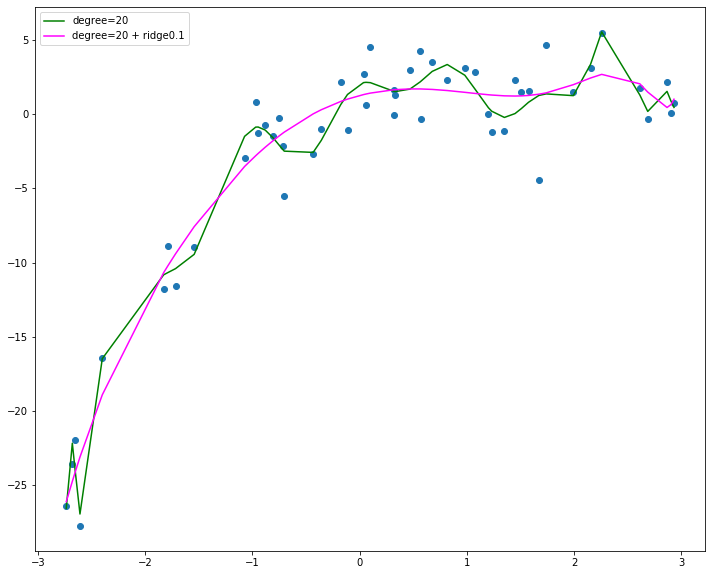

In [51]:
plt.scatter(x, y)
sort_axis = operator.itemgetter(0)


polynomial_features = PolynomialFeatures(degree=20)
X20 = polynomial_features.fit_transform(x.reshape(-1, 1))
model = OLS(endog=y, exog=X20).fit()

sorted_zip = sorted(zip(x, model.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color=colors[1], label="degree={}".format(deg))

sorted_zip = sorted(zip(x, ridge01_fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color=colors[2], label="degree={} + ridge0.1".format(deg))


plt.legend()

In [52]:
?Lasso

In [55]:
lasso01_pipeline = make_pipeline(
    PolynomialFeatures(degree=20),
    StandardScaler(),
    Lasso(alpha=0.1, max_iter=10e5)
)
lasso01_pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000000.0, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [58]:
lasso01_params = [lasso01_pipeline['lasso'].intercept_] + list(lasso01_pipeline['lasso'].coef_[1:])
print("Współczynniki regresji z regularyzacja Ridge: {}".format(lasso01_params))
lasso01_r2 = lasso01_pipeline.score(X, y)
print("R2: {}".format(lasso01_r2))

Współczynniki regresji z regularyzacja Ridge: [-2.5250824234928717, 3.0006869406745493, -4.40749672298982, 3.8994242341936745, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.37638069669593854, 0.0, -0.09000867862771343, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
R2: 0.929788062740845


In [60]:
lasso01_fittedvalues = lasso01_pipeline.predict(X)

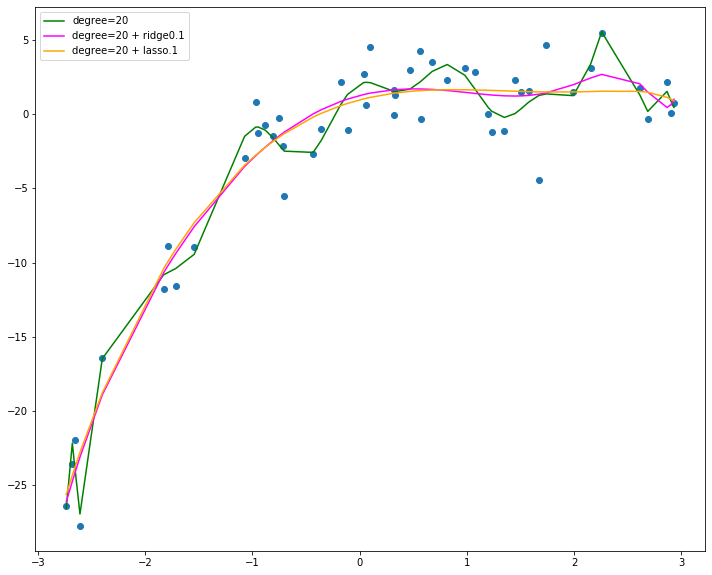

In [61]:
plt.scatter(x, y)
sort_axis = operator.itemgetter(0)


polynomial_features = PolynomialFeatures(degree=20)
X20 = polynomial_features.fit_transform(x.reshape(-1, 1))
model = OLS(endog=y, exog=X20).fit()

sorted_zip = sorted(zip(x, model.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color=colors[1], label="degree={}".format(deg))

sorted_zip = sorted(zip(x, ridge01_fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color=colors[2], label="degree={} + ridge0.1".format(deg))

sorted_zip = sorted(zip(x, lasso01_fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color=colors[3], label="degree={} + lasso.1".format(deg))

plt.legend()

# Zadanie 2

Narysuj wykres funkcji 
$$y = cos(x) + \epsilon$$
dla $x \in [\pi, \frac{2}{3}\pi]$ oraz $\epsilon \in N(0, 0.25)$.

Dopasuj model regresji:
- liniowej
- wielomianej stopnia 2, 10 i 20,
- wielomianej stopnia 20 z regularyzacja Ridge z parametrem $\alpha\in\{0.001, 0.01, 0.1, 1, 2\}$.
- wielomianej stopnia 20 z regularyzacją Lasso z parametrem $\alpha\in\{0.001, 0.01, 0.1, 1, 2\}$.

**Wskazówka**: Napisz funkcję, która dla dowolnego zbioru dopasuje odpowiedni model.